In [2]:
import ugradio
import astropy.units as u
from astropy.coordinates import SkyCoord, AltAz, EarthLocation
from astropy.coordinates import Galactic
import logging
import time
import numpy as np
import math
from ugradio import leo
import astropy as astropy
from astropy.coordinates import SkyCoord                         # High-level coordinates
from astropy.coordinates import ICRS, Galactic, FK4, FK5         # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude       # Angles
from astropy.time import Time


No module named 'rtlsdr'


In [3]:
# Galactic coordinates (l, b) of the object
galactic_coords = SkyCoord(l=120*u.deg, b=0*u.deg, frame='galactic')

# Observing location (latitude, longitude, elevation)
observing_location = EarthLocation(lat=leo.lat*u.deg, lon=-leo.lon*u.deg, height=leo.alt*u.m)

# Time of observation
obs_time = astropy.time.Time(time.time(), format='unix')

# Convert to AltAz frame
altaz_coords = galactic_coords.transform_to(AltAz(obstime=obs_time, location=observing_location))

# Extract altitude and azimuth
altitude = altaz_coords.alt
azimuth = altaz_coords.az


print(f"Altitude: {altitude}")
print(f"Azimuth: {azimuth}")

Altitude: 64.89606155520364 deg
Azimuth: 354.9226590989184 deg


In [4]:
import numpy as np

In [5]:
glons = np.arange(60, 180, 4.6)
glats = np.arange(20, 60, 3.4) 
pointings = np.array([(L,B) for L in glons for B in glats])

In [6]:
pointings[0]

array([60., 20.])

In [7]:
def get_ra_dec(L,B):

    # set galactic coordinates 
    galactic_coords = SkyCoord(l = L*u.deg, b = B*u.deg, frame = 'galactic') 

    # set Leuschner observation location (latitude, longtidue, elevation)
    Leusch_coords = EarthLocation(lat = leo.lat*u.deg, lon = -leo.lon*u.deg, height = leo.alt*u.m)

    # set observation time in UNIX 
    observation_time = astropy.time.Time(time.time(), format = 'unix')

    # get ra, dec
    icrs_coords = galactic_coords.transform_to(ICRS())

    return icrs_coords

In [8]:
get_ra_dec(60,20)

<SkyCoord (ICRS): (ra, dec) in deg
    (275.4099465, 32.44704574)>

In [9]:
from astropy.coordinates import ICRS

In [10]:
pointings[2]

array([60. , 26.8])

In [11]:
ra_dec_gal_coords = []
for i in range(len(pointings)): 
    galactic_coords = pointings[i]
    coords = SkyCoord(l=galactic_coords[0]*u.deg, b=galactic_coords[1]*u.deg, frame='galactic')
    icrs_coords = coords.transform_to(ICRS())
    ra_dec_gal_coords.append([[galactic_coords], [icrs_coords.ra.deg, icrs_coords.dec.deg]])



In [95]:
ra_dec_gal_coords_2 = []

for i in range(len(pointings)): 
    galactic_coords = pointings[i]
    coords = SkyCoord(l=galactic_coords[0]*u.deg, b=galactic_coords[1]*u.deg, frame='galactic')
    icrs_coords = coords.transform_to(ICRS())
    
    # Append the data in the desired format
    ra_dec_gal_coords_2.append([
        galactic_coords[0],  # galactic_l
        galactic_coords[1],  # galactic_b
        icrs_coords.ra.deg,  # ra
        icrs_coords.dec.deg  # dec
    ])



In [96]:
pointings

array([[ 60. ,  20. ],
       [ 60. ,  23.4],
       [ 60. ,  26.8],
       [ 60. ,  30.2],
       [ 60. ,  33.6],
       [ 60. ,  37. ],
       [ 60. ,  40.4],
       [ 60. ,  43.8],
       [ 60. ,  47.2],
       [ 60. ,  50.6],
       [ 60. ,  54. ],
       [ 60. ,  57.4],
       [ 64.6,  20. ],
       [ 64.6,  23.4],
       [ 64.6,  26.8],
       [ 64.6,  30.2],
       [ 64.6,  33.6],
       [ 64.6,  37. ],
       [ 64.6,  40.4],
       [ 64.6,  43.8],
       [ 64.6,  47.2],
       [ 64.6,  50.6],
       [ 64.6,  54. ],
       [ 64.6,  57.4],
       [ 69.2,  20. ],
       [ 69.2,  23.4],
       [ 69.2,  26.8],
       [ 69.2,  30.2],
       [ 69.2,  33.6],
       [ 69.2,  37. ],
       [ 69.2,  40.4],
       [ 69.2,  43.8],
       [ 69.2,  47.2],
       [ 69.2,  50.6],
       [ 69.2,  54. ],
       [ 69.2,  57.4],
       [ 73.8,  20. ],
       [ 73.8,  23.4],
       [ 73.8,  26.8],
       [ 73.8,  30.2],
       [ 73.8,  33.6],
       [ 73.8,  37. ],
       [ 73.8,  40.4],
       [ 73

In [97]:
ra_dec_gal_coords_2 = np.array(ra_dec_gal_coords_2)

In [98]:
ra_dec_gal_coords_2.shape

(324, 4)

In [99]:
ra_dec_gal_coords_2[:,0]

array([ 60. ,  60. ,  60. ,  60. ,  60. ,  60. ,  60. ,  60. ,  60. ,
        60. ,  60. ,  60. ,  64.6,  64.6,  64.6,  64.6,  64.6,  64.6,
        64.6,  64.6,  64.6,  64.6,  64.6,  64.6,  69.2,  69.2,  69.2,
        69.2,  69.2,  69.2,  69.2,  69.2,  69.2,  69.2,  69.2,  69.2,
        73.8,  73.8,  73.8,  73.8,  73.8,  73.8,  73.8,  73.8,  73.8,
        73.8,  73.8,  73.8,  78.4,  78.4,  78.4,  78.4,  78.4,  78.4,
        78.4,  78.4,  78.4,  78.4,  78.4,  78.4,  83. ,  83. ,  83. ,
        83. ,  83. ,  83. ,  83. ,  83. ,  83. ,  83. ,  83. ,  83. ,
        87.6,  87.6,  87.6,  87.6,  87.6,  87.6,  87.6,  87.6,  87.6,
        87.6,  87.6,  87.6,  92.2,  92.2,  92.2,  92.2,  92.2,  92.2,
        92.2,  92.2,  92.2,  92.2,  92.2,  92.2,  96.8,  96.8,  96.8,
        96.8,  96.8,  96.8,  96.8,  96.8,  96.8,  96.8,  96.8,  96.8,
       101.4, 101.4, 101.4, 101.4, 101.4, 101.4, 101.4, 101.4, 101.4,
       101.4, 101.4, 101.4, 106. , 106. , 106. , 106. , 106. , 106. ,
       106. , 106. ,

In [100]:
import pandas as pd

In [18]:
ra_dec_gal_coords_2[5]

array([ 60.        ,  37.        , 255.37913878,  36.71647848])

In [ ]:
gal_ra_dec_dict = {
    'L': ra_dec_gal_coords_2[:,0], 
    'B': ra_dec_gal_coords_2[:,1],
    'RA': ra_dec_gal_coords_2[:,2], 
    'DEC': ra_dec_gal_coords_2[:,3]}



In [20]:
gal_ra_dec = pd.DataFrame(gal_ra_dec_dict)

In [22]:
ra_sorted = gal_ra_dec.sort_values('RA', ascending=True)

In [23]:
ra_sorted.reset_index(inplace=True)

In [24]:
ra_sorted['Galactic_Index'] = ra_sorted['index']

In [25]:
ra_sorted = ra_sorted.drop(columns='index')

In [26]:
ra_sorted

,L,B,RA,DEC,Galactic_Index
0,124.4,20.0,23.851192,82.746098,168
1,124.4,23.4,32.778248,86.042542,169
2,129.0,20.0,52.084066,80.962227,180
3,133.6,20.0,69.006710,77.908980,192
4,129.0,23.4,69.993942,83.367395,181
...,...,...,...,...,...
319,115.2,23.4,309.232324,82.078465,145
320,110.6,20.0,312.501293,76.649154,132
321,115.2,20.0,326.412516,79.953801,144
322,119.8,23.4,334.954938,85.318438,157


In [27]:
ra_sorted.loc[1]

L                 124.400000
B                  23.400000
RA                 32.778248
DEC                86.042542
Galactic_Index    169.000000
Name: 1, dtype: float64

In [28]:
ra_sorted.loc[1][0]

124.39999999999992

In [29]:
ra_sorted.to_csv('RA_Sorted.csv')

In [67]:
ra_sorted

,L,B,RA,DEC,Galactic_Index
0,124.4,20.0,23.851192,82.746098,168
1,124.4,23.4,32.778248,86.042542,169
2,129.0,20.0,52.084066,80.962227,180
3,133.6,20.0,69.006710,77.908980,192
4,129.0,23.4,69.993942,83.367395,181
...,...,...,...,...,...
319,115.2,23.4,309.232324,82.078465,145
320,110.6,20.0,312.501293,76.649154,132
321,115.2,20.0,326.412516,79.953801,144
322,119.8,23.4,334.954938,85.318438,157


In [69]:
ra_sorted.loc[0].dtype

dtype('float64')

In [84]:
time.time()

1713843153.056066

In [ ]:
1713841236
1713841296

In [85]:
def leusch_gal_to_AltAz(L,B):

    # set galactic coordinates 
    galactic_coords = SkyCoord(l = L*u.deg, b = B*u.deg, frame = 'galactic') 

    # set Leuschner observation location (latitude, longtidue, elevation)
    Leusch_coords = EarthLocation(lat = leo.lat*u.deg, lon = -leo.lon*u.deg, height = leo.alt*u.m)

    # set observation time in UNIX 
    observation_time = astropy.time.Time(time.time(), format = 'unix')

    # convert to AltAz using astropy transformation 
    alt_az_coords = galactic_coords.transform_to(AltAz(obstime = observation_time, location = Leusch_coords))

    # get ra, dec
    
    # extract altitude and azimuth from the coordinates 
    alt_point = alt_az_coords.alt.deg
    az_point = alt_az_coords.az.deg

    AltAz_point = [alt_point, az_point]

    return AltAz_point

In [86]:
galactic_coords

array([179.6,  57.4])

In [139]:
ra_dec_az = []

for i in range(len(pointings)): 
    galactic_coords = pointings[i]
    coords = SkyCoord(l=galactic_coords[0]*u.deg, b=galactic_coords[1]*u.deg, frame='galactic')
    icrs_coords = coords.transform_to(ICRS())
    alt_az = leusch_gal_to_AltAz(galactic_coords[0], galactic_coords[1])
    # Append the data in the desired format
    ra_dec_az.append([
        galactic_coords[0],  # galactic_l
        galactic_coords[1],  # galactic_b
        icrs_coords.ra.deg,  # ra
        icrs_coords.dec.deg,  # dec
        alt_az[0], 
        alt_az[1]
    ])

In [140]:
ra_dec_az = np.array(ra_dec_az)

In [141]:
ra_dec_az_dict = {
    'L': ra_dec_az[:,0], 
    'B': ra_dec_az[:,1],
    'RA': ra_dec_az[:,2], 
    'DEC': ra_dec_az[:,3], 
    'ALT': ra_dec_az[:,4], 
    'AZ': ra_dec_az[:,5]}



In [142]:
ra_dec_az_table = pd.DataFrame(ra_dec_az_dict)

In [143]:
ra_dec_az_sorted = ra_dec_az_table.sort_values('RA', ascending=True)

In [144]:
ra_dec_az_sorted.reset_index(inplace=True)

In [145]:
first_hunny = ra_dec_az_sorted[0:100]

In [146]:
first_hunny

,index,L,B,RA,DEC,ALT,AZ
0,168,124.4,20.0,23.851192,82.746098,44.990235,358.774481
1,169,124.4,23.4,32.778248,86.042542,41.758125,0.227375
2,180,129.0,20.0,52.084066,80.962227,46.160215,4.721127
3,192,133.6,20.0,69.006710,77.908980,46.892344,10.914794
4,181,129.0,23.4,69.993942,83.367395,42.839483,5.745861
...,...,...,...,...,...,...,...
95,260,156.6,47.2,149.232136,56.912099,18.099080,30.536473
96,297,170.4,50.6,149.311997,47.242079,11.366036,37.719827
97,235,147.4,43.8,149.488549,64.194280,22.872520,24.660736
98,285,165.8,50.6,150.621767,50.030239,12.722186,35.076093


In [147]:
first_hunny[first_hunny['ALT']<15]

,index,L,B,RA,DEC,ALT,AZ
76,319,179.6,43.8,138.674248,41.957130,13.481394,46.914095
84,320,179.6,47.2,143.238572,41.823769,10.810849,44.760872
86,308,175.0,47.2,143.658295,44.933834,12.651409,42.181078
88,296,170.4,47.2,144.398684,48.016979,14.313332,39.459210
93,321,179.6,50.6,147.771223,41.510818,8.125670,42.645761
94,309,175.0,50.6,148.379288,44.396013,9.830067,40.245860
96,297,170.4,50.6,149.311997,47.242079,11.366036,37.719827
98,285,165.8,50.6,150.621767,50.030239,12.722186,35.076093


In [76]:
leolat = leo.lat

In [77]:
print(leolat)

37.9183


In [31]:
astropy.time.Time(time.time(), format='unix')

<Time object: scale='utc' format='unix' value=1713839537.671554>

In [32]:
from astropy.time import Time
import time

# Get the current UTC time
current_time = Time.now()

# Calculate the time for 10 am tomorrow
tomorrow_time = current_time + 1  # Add one day
tomorrow_time = Time(tomorrow_time.iso.split(' ')[0] + ' 10:00:00', format='iso', scale='utc')

# Convert to Unix time
unix_time = tomorrow_time.unix

print(f"Unix time for 10 am tomorrow: {unix_time}")

Unix time for 10 am tomorrow: 1713952800.0


In [33]:

def altaz_predict(time=unix_time):
    altaz_coords = []
    for i in range(len(ra_sorted)): 
        galactic_coords = np.array([ra_sorted.loc[i][0], ra_sorted.loc[i][1]])
        coords = SkyCoord(l=galactic_coords[0]*u.deg, b=galactic_coords[1]*u.deg, frame='galactic')
        observing_location = EarthLocation(lat=leo.lat*u.deg, lon=-leo.lon*u.deg, height=leo.alt*u.m)
        observation_time = astropy.time.Time(time, format = 'unix')
        altaz = coords.transform_to(AltAz(obstime=observation_time, location=observing_location))
        altaz_coords.append([altaz.alt.deg, altaz.az.deg])
    return altaz_coords

In [34]:
def visible_predict(time=unix_time):
    new_alt = altaz_predict(time = time)
    new_array = np.array(new_alt)
    new_dict = {'alt': new_array[:, 0], 'az': new_array[:, 1]}
    new_dict_frame = pd.DataFrame(new_dict)
    new_below_horiz = new_dict_frame[new_dict_frame['alt']<0]
    return len(new_below_horiz), new_below_horiz


In [35]:
visible_predict(1713961800)
# this corresponds to Wednesday 4/24 at 5:30 am

(0,
 Empty DataFrame
 Columns: [alt, az]
 Index: [])

In [36]:
visible_predict(1713978000)
# this corresponds to Wednesday 4/24 at 10:00 am 

(0,
 Empty DataFrame
 Columns: [alt, az]
 Index: [])

In [81]:
time.time()

1713843052.42901

In [82]:
visible_predict(1713843052.42901)

(26,
            alt          az
 185  -0.223326  349.871850
 188  -1.935675  348.080399
 190  -3.763456  346.405166
 194  -5.697281  344.850506
 196  -7.727740  343.420350
 198  -9.845446  342.118433
 200 -12.041054  340.948522
 201  -1.548718  343.822470
 204  -3.653472  342.124119
 205  -5.861089  340.558339
 207  -8.161558  339.127728
 210 -10.545060  337.834937
 215  -1.601470  339.410153
 218  -3.980033  337.715485
 220  -6.455941  336.162294
 221  -9.018944  334.751778
 227  -2.089277  334.885628
 228  -4.733313  333.216875
 229  -7.467382  331.694797
 236  -5.894974  328.659591
 237  -0.193460  332.062591
 238  -2.998315  330.286144
 244  -4.306252  325.641632
 246  -1.255532  327.364721
 252  -2.705698  322.636303
 261  -1.097747  319.638925)

In [38]:
visible_predict(1713796176)

(0,
 Empty DataFrame
 Columns: [alt, az]
 Index: [])

In [41]:

visible_predict(1713841236)

(20,
           alt          az
 100 -0.549129   33.118134
 111 -2.935307   30.694431
 113 -1.227129   28.897917
 188 -0.454582  343.291230
 190 -2.104586  341.442056
 194 -3.873772  339.704698
 196 -5.752982  338.083818
 198 -7.733002  336.583588
 200 -9.804616  335.207907
 204 -1.571524  337.199740
 205 -3.616575  335.429827
 207 -5.769016  333.788676
 210 -8.018960  332.279081
 218 -1.472486  332.788344
 220 -3.791510  331.013128
 221 -6.212826  329.376012
 228 -1.805193  328.250283
 229 -4.390996  326.492893
 236 -2.558166  323.623868
 244 -0.718967  320.763054)

In [215]:
# Define the specific RA and Dec coordinate (in degrees)
ra = 32.778248
dec = 86.042542

# Define the start and end time for the calculation
time_start = Time('2024-04-18T00:00:00', scale='utc')
time_end = Time('2024-04-20T00:00:00', scale='utc')

# Create a list to store the times when RA and Dec are above the horizon
times_above_horizon = []

# Iterate over the time from start to end in steps of 1 hour
for time_step in np.arange(0, (time_end - time_start).to_value(u.hour), 1):
    
    observing_location = EarthLocation(lat=leo.lat*u.deg, lon=-leo.lon*u.deg, height=leo.alt*u.m)
    # Calculate the time for the current step
    current_time = time_start + time_step * u.hour
    
    # Create a SkyCoord object for the specific RA and Dec
    coords = SkyCoord(ra=ra, dec=dec, unit='deg', frame='icrs')
    
    # Calculate AltAz coordinates for the current time and location
    altaz = coords.transform_to(AltAz(obstime=current_time, location=observing_location))
    
    # Check if the altitude of RA and Dec is above zero
    if altaz.alt.deg > 0:
        times_above_horizon.append(current_time.to_datetime())

# Print the times when RA and Dec are above the horizon
for time in times_above_horizon:
    print(f"RA: {ra}, Dec: {dec}, Time (UTC): {time}")

RA: 32.778248, Dec: 86.042542, Time (UTC): 2024-04-18 00:00:00
RA: 32.778248, Dec: 86.042542, Time (UTC): 2024-04-18 01:00:00
RA: 32.778248, Dec: 86.042542, Time (UTC): 2024-04-18 02:00:00
RA: 32.778248, Dec: 86.042542, Time (UTC): 2024-04-18 03:00:00
RA: 32.778248, Dec: 86.042542, Time (UTC): 2024-04-18 04:00:00
RA: 32.778248, Dec: 86.042542, Time (UTC): 2024-04-18 05:00:00
RA: 32.778248, Dec: 86.042542, Time (UTC): 2024-04-18 06:00:00
RA: 32.778248, Dec: 86.042542, Time (UTC): 2024-04-18 07:00:00
RA: 32.778248, Dec: 86.042542, Time (UTC): 2024-04-18 08:00:00
RA: 32.778248, Dec: 86.042542, Time (UTC): 2024-04-18 09:00:00
RA: 32.778248, Dec: 86.042542, Time (UTC): 2024-04-18 10:00:00
RA: 32.778248, Dec: 86.042542, Time (UTC): 2024-04-18 11:00:00
RA: 32.778248, Dec: 86.042542, Time (UTC): 2024-04-18 12:00:00
RA: 32.778248, Dec: 86.042542, Time (UTC): 2024-04-18 13:00:00
RA: 32.778248, Dec: 86.042542, Time (UTC): 2024-04-18 14:00:00
RA: 32.778248, Dec: 86.042542, Time (UTC): 2024-04-18 1

In [146]:
import matplotlib.pyplot as plt

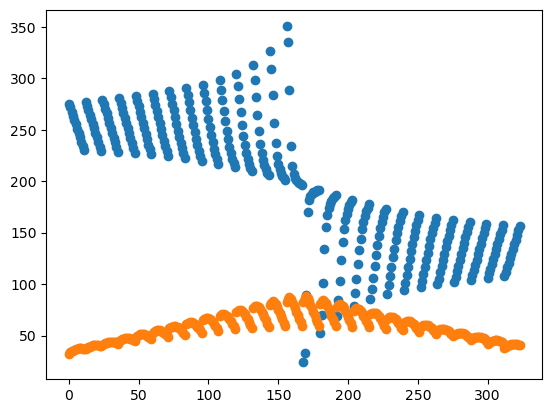

In [149]:
plt.scatter(range(len(gal_ra_dec)), (gal_ra_dec['RA']))
plt.scatter(range(len(gal_ra_dec)), (gal_ra_dec['DEC']))
#plt.plot(gal_ra_dec['L'], gal_ra_dec['B'])

In [68]:
ra_dec_gal_coords

[[[array([60., 20.])], [275.4099465006669, 32.44704573697857]],
 [[array([60. , 23.4])], [271.57775804742187, 33.55743568956647]],
 [[array([60. , 26.8])], [267.65132671741213, 34.546814588456684]],
 [[array([60. , 30.2])], [263.6366826665167, 35.407641930429385]],
 [[array([60. , 33.6])], [259.5423120404737, 36.13293452571155]],
 [[array([60., 37.])], [255.37913877895232, 36.716478476806486]],
 [[array([60. , 40.4])], [251.16036251726064, 37.15303984043927]],
 [[array([60. , 43.8])], [246.9011415541328, 37.438558605176524]],
 [[array([60. , 47.2])], [242.61812746349955, 37.57030979885039]],
 [[array([60. , 50.6])], [238.32887768577496, 37.547016913593694]],
 [[array([60., 54.])], [234.05119045539215, 37.368906516953736]],
 [[array([60. , 57.4])], [229.80241862952712, 37.03769848983667]],
 [[array([64.6, 20. ])], [277.1869841999899, 36.513989899030676]],
 [[array([64.6, 23.4])], [273.1424702704984, 37.58271117219223]],
 [[array([64.6, 26.8])], [268.988149184952, 38.50961825161651]],
 [